In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.isnull().sum() # no missing values found

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

classification - check if classes are balanced or imbalanced

`pip install imblearn`    to handle class - imbalance

<Axes: ylabel='count'>

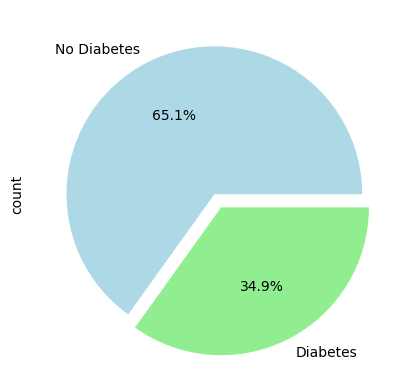

In [59]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%',
    labels=['No Diabetes', 'Diabetes'], colors=['lightblue', 'lightgreen'], explode=(0, 0.1))

importing libraries

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [61]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training data =>",X_train.shape, y_train.shape)

Training data => (614, 8) (614,)


In [62]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
model

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

grid search cv - to find best parameters for the model

In [63]:
# dt is the name of DEcisionTreeClassifier in the pipeline
params = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': list(range(5, 100, 10))
}
grid = GridSearchCV(model, param_grid=params, cv=5, verbose=1)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

fitting the model

In [64]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

best parameters

In [65]:
grid.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 5}

all the metrics as a dataframe


In [66]:
result_df = pd.DataFrame(grid.cv_results_)
result_df.sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006370,0.001063,0.002066,0.000743,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.804878,0.699187,0.666667,0.772358,0.811475,0.750913,0.057988,1
10,0.002703,0.005406,0.000000,0.000000,entropy,5,"{'dt__criterion': 'entropy', 'dt__max_depth': 5}",0.796748,0.699187,0.634146,0.764228,0.811475,0.741157,0.066000,2
20,0.003003,0.006005,0.000420,0.000839,log_loss,5,"{'dt__criterion': 'log_loss', 'dt__max_depth': 5}",0.796748,0.699187,0.617886,0.764228,0.811475,0.737905,0.071374,3


extract the best model

In [67]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=5))])

check the confusion matrix

In [68]:
y_pred = best_model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[86, 13],
       [23, 32]], dtype=int64)

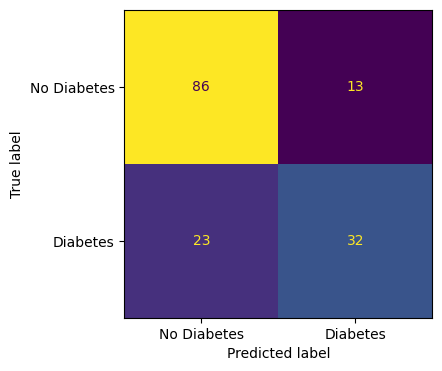

In [69]:
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cf, display_labels=['No Diabetes', 'Diabetes']).plot(ax=ax, colorbar=False)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



<Axes: >

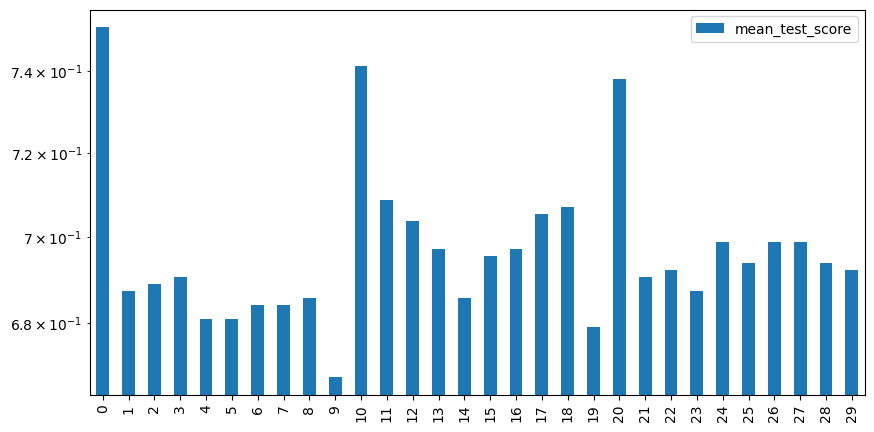

In [71]:
result_df[['mean_test_score']].plot(kind='bar', logy=True, figsize=(10, 5))

In [72]:
import joblib
joblib.dump(best_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

make a gradio app for this model 17/march/2024

In [73]:
from imblearn.under_sampling import RandomUnderSampler

before undersample
Outcome
0    401
1    213
Name: count, dtype: int64
after undersample
Outcome
0    213
1    213
Name: count, dtype: int64


<Axes: ylabel='count'>

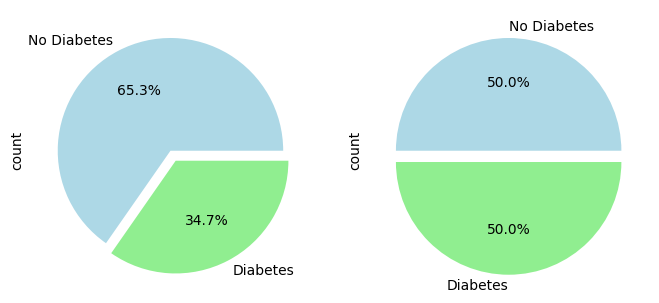

In [75]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
rus = RandomUnderSampler()
print("before undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie',
    autopct='%.1f%%',
    labels=['No Diabetes', 'Diabetes'],
    colors=['lightblue', 'lightgreen'],
    explode=(0, 0.1),
    ax=ax1)

X_train, y_train = rus.fit_resample(X_train, y_train)
print("after undersample")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie',
    autopct='%.1f%%',
    labels=['No Diabetes', 'Diabetes'],
    colors=['lightblue', 'lightgreen'],
    explode=(0, 0.1),
    ax=ax2)